# Análisis Exploratorio de Datos - Sistema de Ventas


# Objetivo: Preparar y analizar datos de ventas para modelado predictivo

## Este notebook realiza un análisis completo de los datos de ventas, incluyendo:
 - Carga y exploración inicial de datos
 - Cálculo de métricas de negocio
 - Visualizaciones gráficas
 - Detección de outliers
 - Análisis temporal de ventas
 - Preparación de dataset para modelado

 ## 1. Configuración del Entorno

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga de Datos

In [3]:
# Carga de datasets con parseo de fechas
print("📂 Cargando datasets...")


df_sales = pd.read_csv('/kaggle/input/dataset/sales.csv', parse_dates=["SalesDate"])
df_employees = pd.read_csv('/kaggle/input/dataset/employees.csv', parse_dates=["BirthDate", "HireDate"])
df_products = pd.read_csv('/kaggle/input/dataset/products.csv')

print(f"✅ Datos cargados:")
print(f"   - Ventas: {len(df_sales):,} registros")
print(f"   - Empleados: {len(df_employees):,} registros")
print(f"   - Productos: {len(df_products):,} registros")


📂 Cargando datasets...
✅ Datos cargados:
   - Ventas: 6,758,125 registros
   - Empleados: 23 registros
   - Productos: 452 registros


## 3. Exploración Inicial

In [4]:
print("=" * 60)
print("INFORMACIÓN DE VENTAS")
print("=" * 60)
df_sales.info()

print("\n" + "=" * 60)
print("PRIMERAS FILAS")
print("=" * 60)
display(df_sales.head())

print("\n" + "=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)
display(df_sales.describe())

INFORMACIÓN DE VENTAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         float64       
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 464.0+ MB

PRIMERAS FILAS


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3



ESTADÍSTICAS DESCRIPTIVAS


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate
count,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6758125.0,6690599
mean,3.379063e+06,1.199972e+01,4.939567e+04,2.265663e+02,1.300401e+01,2.996787e-02,0.0,2018-03-06 12:28:36.599014144
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,2018-01-01 00:00:04.070000
25%,1.689532e+06,6.000000e+00,2.470700e+04,1.140000e+02,7.000000e+00,0.000000e+00,0.0,2018-02-02 06:29:42.464999936
50%,3.379063e+06,1.200000e+01,4.941400e+04,2.270000e+02,1.300000e+01,0.000000e+00,0.0,2018-03-06 13:05:36.860000
75%,5.068594e+06,1.800000e+01,7.407500e+04,3.400000e+02,1.900000e+01,0.000000e+00,0.0,2018-04-07 18:07:28.464999936
max,6.758125e+06,2.300000e+01,9.875900e+04,4.105600e+04,2.500000e+01,2.000000e-01,0.0,2018-05-09 23:59:59.400000
std,1.950903e+06,6.632689e+00,2.850504e+04,1.319970e+02,7.209701e+00,6.398096e-02,0.0,NaN


## Buscamos filas duplicadas en productos.

In [5]:
df_products.duplicated = df_products.duplicated().sum()
print(f"🔍 Número de filas duplicadas en productos: {df_products.duplicated}")

🔍 Número de filas duplicadas en productos: 0


## 4. Cálculo de Precio Total Real

In [6]:
print("💰 Calculando precio total real de ventas...")

# Merge con productos para obtener precio
df_sales = pd.merge(df_sales, df_products[['ProductID', 'Price']], on='ProductID', how='left', validate='many_to_one')

# Calcular precio total
df_sales['TotalPriceCalculated'] = df_sales['Quantity'] * df_sales['Price'] * (1 - df_sales['Discount'])

print("✅ Columna 'TotalPriceCalculated' creada")
print(f"\n📊 Estadísticas de TotalPriceCalculated:")
display(df_sales['TotalPriceCalculated'])


💰 Calculando precio total real de ventas...
✅ Columna 'TotalPriceCalculated' creada

📊 Estadísticas de TotalPriceCalculated:


0           309.63590
1           437.82200
2          1896.44160
3          1236.01384
4           719.80200
              ...    
6758120     904.40220
6758121     565.59294
6758122       7.70040
6758123    2259.68330
6758124    1093.19640
Name: TotalPriceCalculated, Length: 6758125, dtype: float64

 ### 📊 Visualización : Distribución de Ventas Totales

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


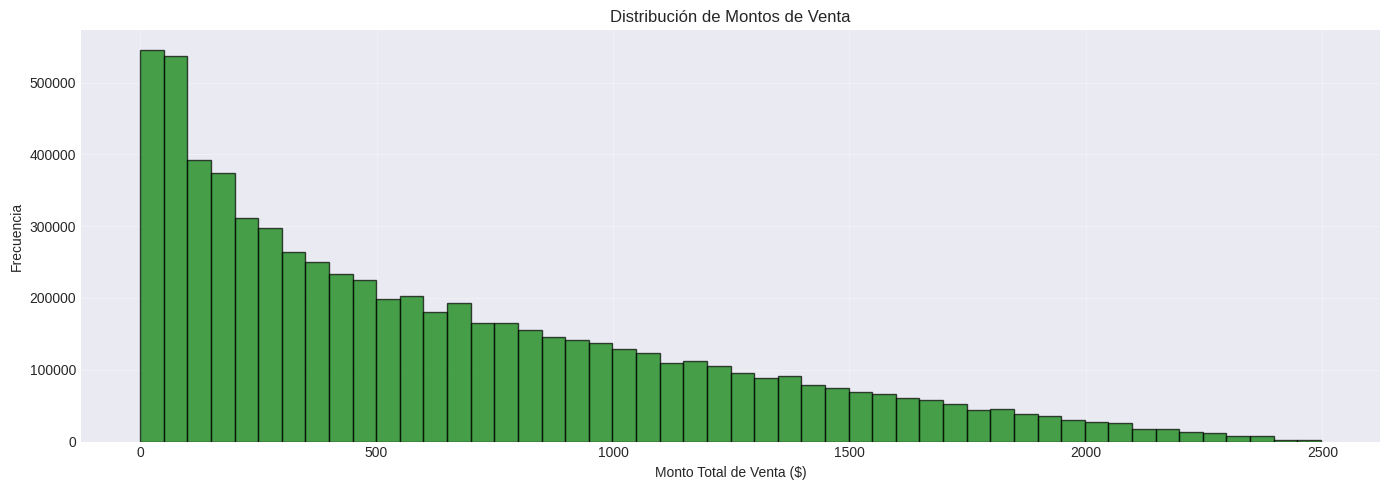

Se ve una distribución, indicando ventas atípicas altas


In [7]:
fig, axes = plt.subplots( figsize=(14, 5))

# Histograma de ventas totales
axes.hist(df_sales['TotalPriceCalculated'], bins=50, color='green', 
             edgecolor='black', alpha=0.7)
axes.set_xlabel('Monto Total de Venta ($)')
axes.set_ylabel('Frecuencia')
axes.set_title('Distribución de Montos de Venta')
axes.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

print("Se ve una distribución, indicando ventas atípicas altas")

## Buscamos filas duplicadas en ventas.

In [8]:
duplicados = df_sales.duplicated().sum()
print(f"🔍 Número de filas duplicadas en ventas: {duplicados}")

🔍 Número de filas duplicadas en ventas: 0


 ## 5. Detección de Outliers, anomalías, fuera de rango

In [9]:
# Cálculo de cuartiles y rango intercuartílico
Q1 = df_sales['TotalPriceCalculated'].quantile(0.25)
Q3 = df_sales['TotalPriceCalculated'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Marcar outliers
df_sales['IsOutlier'] = ((df_sales['TotalPriceCalculated'] < lower_bound) | 
                        (df_sales['TotalPriceCalculated'] > upper_bound))

num_outliers = df_sales['IsOutlier'].sum()
pct_outliers = (num_outliers / len(df_sales)) * 100

print(f"✅ Outliers detectados: {num_outliers:,} ({pct_outliers:.2f}%)")
print(f"   - Límite inferior: ${lower_bound:.2f}")
print(f"   - Límite superior: ${upper_bound:.2f}")

✅ Outliers detectados: 48,217 (0.71%)
   - Límite inferior: $-1030.89
   - Límite superior: $2189.99


## 6. Análisis Temporal entre Semana vs Fin de Semana

In [10]:
print("📅 Analizando patrones temporales de ventas...")

# Extraer día de la semana
df_sales['DayOfWeek'] = df_sales['SalesDate'].dt.dayofweek

# Clasificar entre semana vs fin de semana
df_sales['Weekday_Weekend'] = df_sales['DayOfWeek'].apply(
    lambda x: 'Fin de semana' if x >= 5 else 'Entre semana'
)

# Calcular totales y agregamos estadísticas.
sales_by_day_type = df_sales.groupby('Weekday_Weekend')['TotalPriceCalculated'].agg([
    ('Total_Ventas', 'sum'),
    ('Cantidad_Transacciones', 'count'),
    ('Venta_Promedio', 'mean')
]).sort_values('Total_Ventas', ascending=False)

print("\n📊 Ventas por tipo de día:")
display(sales_by_day_type)

most_sales_day_type = sales_by_day_type.index[0]
print(f"\n💡 La empresa vende más durante: {most_sales_day_type}")


📅 Analizando patrones temporales de ventas...

📊 Ventas por tipo de día:


,Total_Ventas,Cantidad_Transacciones,Venta_Promedio
Weekday_Weekend,,,
Entre semana,3.123405e+09,4891076,638.592557
Fin de semana,1.192863e+09,1867032,638.908680



💡 La empresa vende más durante: Entre semana


### 📊 Visualización : Comparación Entre Semana vs Fin de Semana

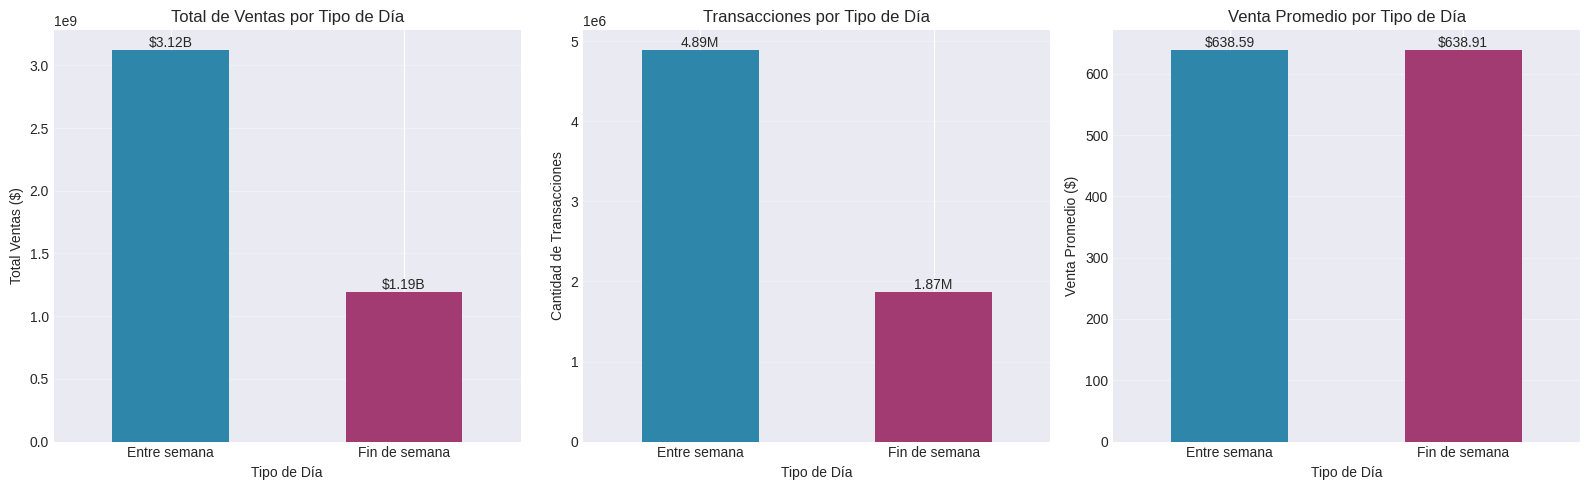

💡 Insight: Las ventas entre semana superan ampliamente a las de fin de semana


In [11]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Gráfico 1: Total de ventas
sales_by_day_type['Total_Ventas'].plot(kind='bar', ax=axes[0], color=['#2E86AB', '#A23B72'])
axes[0].set_xlabel('Tipo de Día')
axes[0].set_ylabel('Total Ventas ($)')
axes[0].set_title('Total de Ventas por Tipo de Día')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(sales_by_day_type['Total_Ventas']):
    axes[0].text(i, v, f'${v/1e9:.2f}B', ha='center', va='bottom')

# Gráfico 2: Cantidad de transacciones
sales_by_day_type['Cantidad_Transacciones'].plot(kind='bar', ax=axes[1], color=['#2E86AB', '#A23B72'])
axes[1].set_xlabel('Tipo de Día')
axes[1].set_ylabel('Cantidad de Transacciones')
axes[1].set_title('Transacciones por Tipo de Día')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(sales_by_day_type['Cantidad_Transacciones']):
    axes[1].text(i, v, f'{v/1e6:.2f}M', ha='center', va='bottom')

# Gráfico 3: Venta promedio
sales_by_day_type['Venta_Promedio'].plot(kind='bar', ax=axes[2], color=['#2E86AB', '#A23B72'])
axes[2].set_xlabel('Tipo de Día')
axes[2].set_ylabel('Venta Promedio ($)')
axes[2].set_title('Venta Promedio por Tipo de Día')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(sales_by_day_type['Venta_Promedio']):
    axes[2].text(i, v, f'${v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("💡 Insight: Las ventas entre semana superan ampliamente a las de fin de semana")

## 7. Verificar en qué rango horario se vende más, separado cada hora.

In [14]:
# Crear columna Hour (0–23)
df_sales['Hour'] = df_sales['SalesDate'].dt.hour

# Ventas totales por hora (suma de TotalPriceCalculated)
salesByHour = df_sales.groupby('Hour', dropna=False)['TotalPriceCalculated'].sum().sort_values(ascending=False)
display(salesByHour)
print('La hora con mas ventas es la hora 16')

Hour
16.0    1.790144e+08
20.0    1.789492e+08
2.0     1.784208e+08
6.0     1.783812e+08
19.0    1.783461e+08
0.0     1.783134e+08
17.0    1.782904e+08
9.0     1.781666e+08
11.0    1.781430e+08
15.0    1.780218e+08
10.0    1.779786e+08
23.0    1.779681e+08
4.0     1.779327e+08
18.0    1.779325e+08
13.0    1.778999e+08
21.0    1.778853e+08
8.0     1.778822e+08
1.0     1.778232e+08
7.0     1.778178e+08
14.0    1.777444e+08
22.0    1.776903e+08
12.0    1.776626e+08
5.0     1.775062e+08
3.0     1.774438e+08
NaN     4.305289e+07
Name: TotalPriceCalculated, dtype: float64

La hora con mas ventas es la hora 16


## 8. Análisis de Empleados: Edad y Experiencia

In [15]:
# Realizamos la unión con Employers.

df_sales = df_sales.merge(df_employees[['EmployeeID', 'HireDate', 'BirthDate']], 
                 left_on='SalesPersonID', right_on='EmployeeID',
                 how='left', validate='m:1')
df_sales = df_sales.rename(columns={'HireDate': 'EmployeeHireDate', 'BirthDate': 'EmployeeBirthDate'})
df_sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,TotalPriceCalculated,IsOutlier,DayOfWeek,Weekday_Weekend,Hour,EmployeeID,EmployeeHireDate,EmployeeBirthDate
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,309.63590,False,0.0,Entre semana,7.0,6,2013-06-22 13:20:18.080,1987-01-13
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,437.82200,False,4.0,Entre semana,16.0,16,2017-02-10 11:21:26.650,1951-07-07
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,1896.44160,False,3.0,Entre semana,19.0,13,2011-12-12 10:43:52.940,1963-04-18
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,1236.01384,False,5.0,Fin de semana,14.0,8,2014-10-14 23:12:53.420,1956-12-13
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,719.80200,False,0.0,Entre semana,15.0,10,2012-07-23 15:02:12.640,1963-12-30


### Edad al ser contratado 

In [17]:
#Calculamos la edad que tenia el empleado al momento de la contratacion y agregamos la columna al dataframe.
years = df_sales['EmployeeHireDate'].dt.year - df_sales['EmployeeBirthDate'].dt.year
before_birthday = (
    (df_sales['EmployeeHireDate'].dt.month < df_sales['EmployeeBirthDate'].dt.month) |
    ((df_sales['EmployeeHireDate'].dt.month == df_sales['EmployeeBirthDate'].dt.month) &
     (df_sales['EmployeeHireDate'].dt.day < df_sales['EmployeeBirthDate'].dt.day))
).astype(int)

df_sales['EmployeeAgeAtHire'] = (years - before_birthday).astype('Int64')
df_sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,TotalPriceCalculated,IsOutlier,DayOfWeek,Weekday_Weekend,Hour,EmployeeID,EmployeeHireDate,EmployeeBirthDate,EmployeeAgeAtHire
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,309.63590,False,0.0,Entre semana,7.0,6,2013-06-22 13:20:18.080,1987-01-13,26
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,437.82200,False,4.0,Entre semana,16.0,16,2017-02-10 11:21:26.650,1951-07-07,65
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,1896.44160,False,3.0,Entre semana,19.0,13,2011-12-12 10:43:52.940,1963-04-18,48
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,1236.01384,False,5.0,Fin de semana,14.0,8,2014-10-14 23:12:53.420,1956-12-13,57
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,719.80200,False,0.0,Entre semana,15.0,10,2012-07-23 15:02:12.640,1963-12-30,48


### Antiguedad al momento de la venta en años.

In [19]:
#Ahora la antiguedad del empleado al momento de la venta
years = df_sales['SalesDate'].dt.year - df_sales['EmployeeHireDate'].dt.year
before_experience = (
    (df_sales['SalesDate'].dt.month < df_sales['EmployeeHireDate'].dt.month) |
    ((df_sales['SalesDate'].dt.month == df_sales['EmployeeHireDate'].dt.month) &
     (df_sales['SalesDate'].dt.day < df_sales['EmployeeHireDate'].dt.day))
).astype(int)

#Aclaracion la experiencia es en años, si no llega al año se mostrara "0".


df_sales['EmployeeExperience'] = (years - before_experience).astype('Int64')
df_sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,TotalPriceCalculated,IsOutlier,DayOfWeek,Weekday_Weekend,Hour,EmployeeID,EmployeeHireDate,EmployeeBirthDate,EmployeeAgeAtHire,EmployeeExperience
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,309.63590,False,0.0,Entre semana,7.0,6,2013-06-22 13:20:18.080,1987-01-13,26,4
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,437.82200,False,4.0,Entre semana,16.0,16,2017-02-10 11:21:26.650,1951-07-07,65,0
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,1896.44160,False,3.0,Entre semana,19.0,13,2011-12-12 10:43:52.940,1963-04-18,48,6
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,1236.01384,False,5.0,Fin de semana,14.0,8,2014-10-14 23:12:53.420,1956-12-13,57,3
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,719.80200,False,0.0,Entre semana,15.0,10,2012-07-23 15:02:12.640,1963-12-30,48,5


## 9. Preparación Final del Dataset

In [21]:
print("🎯 Preparando dataset final para modelado...")

# Merge completo con información de productos
df_final = pd.merge(
    df_sales, 
    df_products[['ProductID', 'ProductName', 'CategoryID', 'Class', 
                 'Resistant', 'IsAllergic', 'VitalityDays']], 
    on='ProductID', 
    how='left'
)


df_final.head()

🎯 Preparando dataset final para modelado...


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,...,EmployeeHireDate,EmployeeBirthDate,EmployeeAgeAtHire,EmployeeExperience,ProductName,CategoryID,Class,Resistant,IsAllergic,VitalityDays
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,...,2013-06-22 13:20:18.080,1987-01-13,26,4,Vaccum Bag 10x13,1.0,High,Unknown,Unknown,41.0
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,...,2017-02-10 11:21:26.650,1951-07-07,65,0,Sardines,8.0,Low,Durable,FALSE,90.0
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,...,2011-12-12 10:43:52.940,1963-04-18,48,6,Crab - Imitation Flakes,11.0,Medium,Durable,TRUE,0.0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,...,2014-10-14 23:12:53.420,1956-12-13,57,3,Smirnoff Green Apple Twist,6.0,High,Durable,TRUE,90.0
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,...,2012-07-23 15:02:12.640,1963-12-30,48,5,Coffee - Dark Roast,9.0,Low,Weak,FALSE,0.0


### Usamos One-Hot Encoding para columnas consideradas

In [23]:
# One-Hot Encoding para variables categóricas usando "get.dummies"
categorical_cols = ['Weekday_Weekend', 'Class', 'Resistant', 'IsAllergic']
df_final = pd.get_dummies(df_final, columns=categorical_cols, drop_first=True)

print(f"✅ Dataset final preparado con {len(df_final):,} registros y {len(df_final.columns)} variables")
print("\n📋 Primeras filas del dataset final:")
display(df_final.head())

print("\n📊 Información del dataset:")
df_final.info()

✅ Dataset final preparado con 6,758,125 registros y 29 variables

📋 Primeras filas del dataset final:


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,...,ProductName,CategoryID,VitalityDays,Weekday_Weekend_Fin de semana,Class_Low,Class_Medium,Resistant_Unknown,Resistant_Weak,IsAllergic_TRUE,IsAllergic_Unknown
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,...,Vaccum Bag 10x13,1.0,41.0,False,False,False,True,False,False,True
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,...,Sardines,8.0,90.0,False,True,False,False,False,False,False
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,...,Crab - Imitation Flakes,11.0,0.0,False,False,True,False,False,True,False
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,...,Smirnoff Green Apple Twist,6.0,90.0,True,False,False,False,False,True,False
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,...,Coffee - Dark Roast,9.0,0.0,False,True,False,False,True,False,False



📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 29 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   SalesID                        int64         
 1   SalesPersonID                  int64         
 2   CustomerID                     int64         
 3   ProductID                      int64         
 4   Quantity                       int64         
 5   Discount                       float64       
 6   TotalPrice                     float64       
 7   SalesDate                      datetime64[ns]
 8   TransactionNumber              object        
 9   Price                          float64       
 10  TotalPriceCalculated           float64       
 11  IsOutlier                      bool          
 12  DayOfWeek                      float64       
 13  Hour                           float64       
 14  EmployeeID                     int64  

## 10. Resumen analítico

In [25]:
print("=" * 40)
print("RESUMEN DEL ANÁLISIS")
print("=" * 40)

resumen = {
    "Total de registros analizados": f"{len(df_sales):,}",
    "Período analizado": f"{df_sales['SalesDate'].min().date()} a {df_sales['SalesDate'].max().date()}",
    "Total de ventas": f"${df_sales['TotalPriceCalculated'].sum():,.2f}",
    "Venta promedio": f"${df_sales['TotalPriceCalculated'].mean():.2f}",
    "Outliers detectados": f"{num_outliers:,} ({pct_outliers:.2f}%)",
    "Ventas entre semana": f"${sales_by_day_type.loc['Entre semana', 'Total_Ventas']:,.2f}",
    "Ventas fin de semana": f"${sales_by_day_type.loc['Fin de semana', 'Total_Ventas']:,.2f}",
    "Total de productos": len(df_products),
    "Total de empleados": len(df_employees),
    "Variables en dataset final": len(df_final.columns)
}

for key, value in resumen.items():
    print(f"• {key}: {value}")

RESUMEN DEL ANÁLISIS
• Total de registros analizados: 6,758,125
• Período analizado: 2018-01-01 a 2018-05-09
• Total de ventas: $4,316,267,678.92
• Venta promedio: $638.68
• Outliers detectados: 48,217 (0.71%)
• Ventas entre semana: $3,123,404,728.48
• Ventas fin de semana: $1,192,862,950.44
• Total de productos: 452
• Total de empleados: 23
• Variables en dataset final: 29


## Exportamos el archivo

In [27]:
df_final.to_csv('/kaggle/working/dataset_ventas_procesado.csv', index=False)
print("✅ Dataset exportado como '/dataset_ventas_procesado.csv'")


✅ Dataset exportado como '/dataset_ventas_procesado.csv'
